In [ ]:
import os
import graphviz
from sklearn.tree import export_graphviz
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, roc_auc_score, ConfusionMatrixDisplay
)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.cluster import KMeans
#print(os.getcwd())
#if os.path.basename(os.getcwd()) != 'NeuroCurve': os.chdir('NeuroCurve')

# Exploratory Data Analysis

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

None

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


                           PatientID       Age    Gender  Ethnicity  \
PatientID                   1.000000  0.002947 -0.043665  -0.007608   
Age                         0.002947  1.000000  0.028708   0.027745   
Gender                     -0.043665  0.028708  1.000000  -0.003660   
Ethnicity                  -0.007608  0.027745 -0.003660   1.000000   
EducationLevel             -0.001729 -0.060560 -0.007070   0.026516   
BMI                        -0.034228 -0.015677  0.005928  -0.003176   
Smoking                     0.021907  0.020060  0.016650   0.031485   
AlcoholConsumption         -0.020733  0.007323  0.004330   0.008363   
PhysicalActivity           -0.011424 -0.010249 -0.035795   0.020498   
DietQuality                -0.018490 -0.023386  0.010942  -0.018184   
SleepQuality               -0.026069  0.049139  0.007310   0.029304   
FamilyHistoryAlzheimers     0.002187 -0.018784  0.018421   0.022526   
CardiovascularDisease       0.017675 -0.015284  0.034577   0.002347   
Diabet

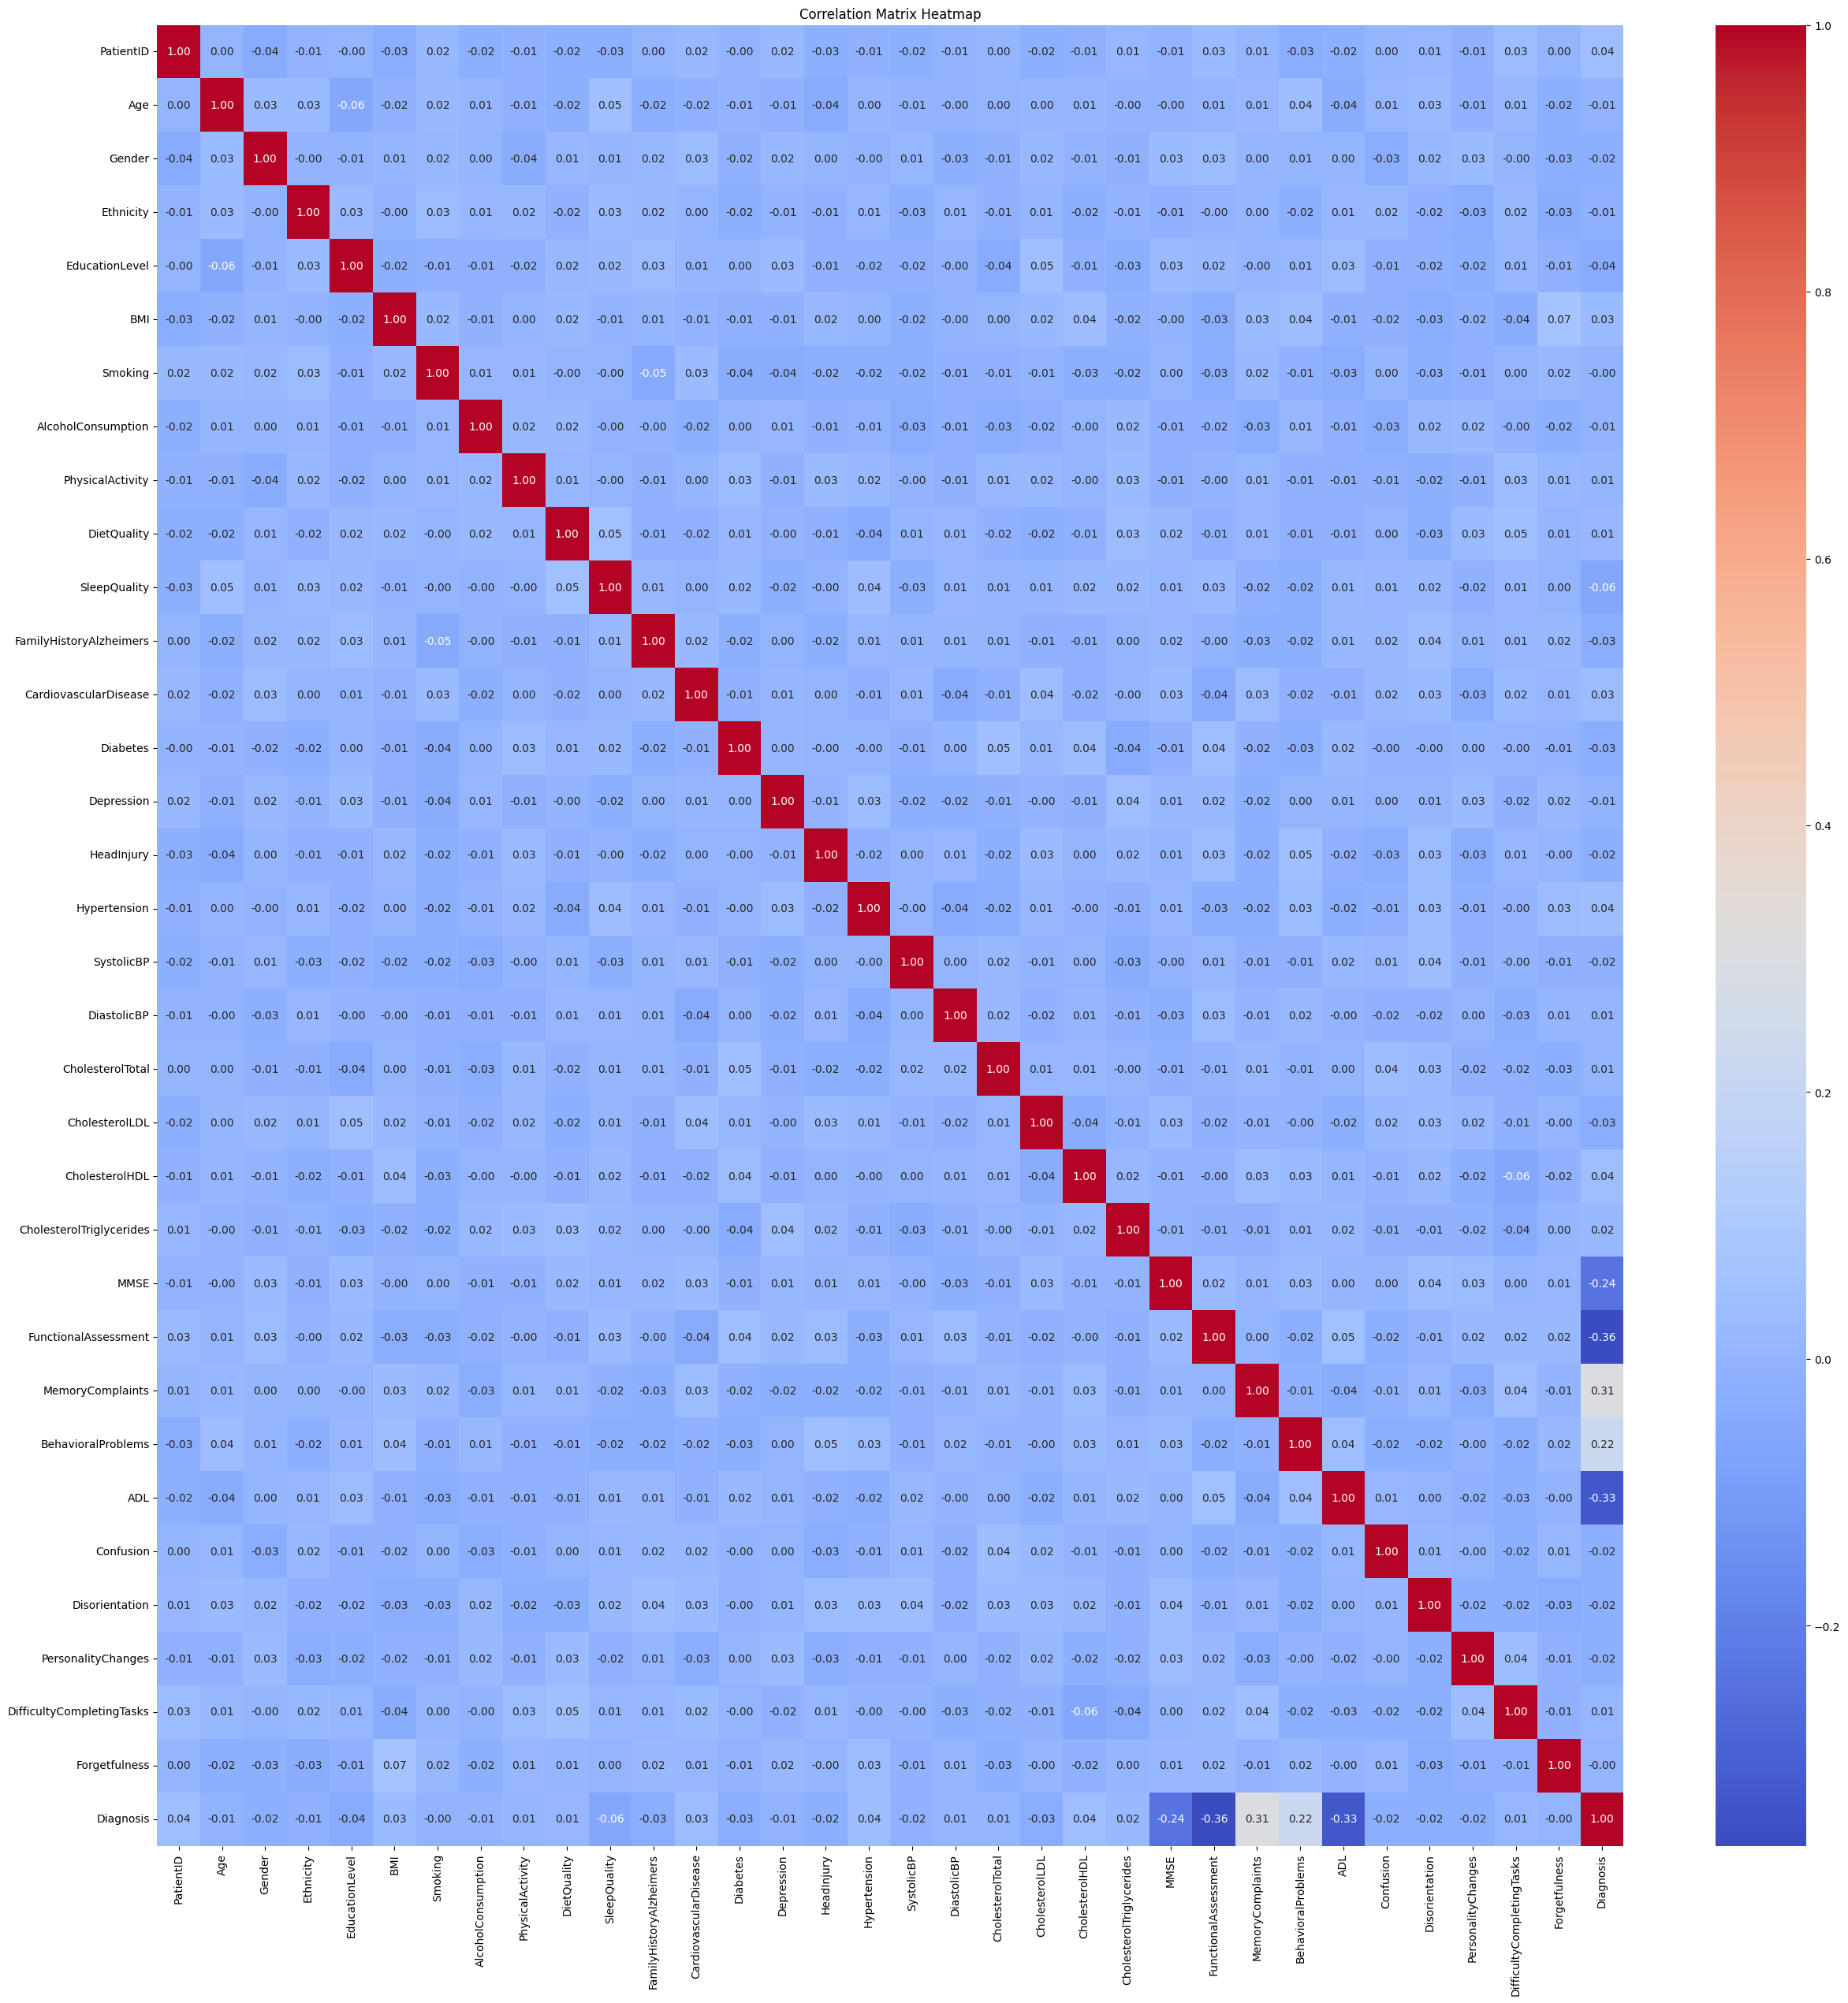

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

In [18]:
os.chdir('..')
NeuroCurveOG = pd.read_csv("CSV/alzheimers_disease_data.csv")
os.chdir('NeuroPy') 
display(NeuroCurveOG.head())
display(NeuroCurveOG.info())
display(NeuroCurveOG.describe()) #Look at dataframe
NeuroCurveOG_numeric = NeuroCurveOG.select_dtypes(include=['number'])
corr_matrix = NeuroCurveOG_numeric.corr() #create correlation matrix 
print(corr_matrix)
plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()
NeuroCurveOG.isnull().sum() #check for nulls

## Processing

In [19]:
os.chdir('..')
NeuroCurveOG = pd.read_csv("CSV/alzheimers_disease_data.csv")
"Drops any unnecessary features of the original dataset"
def pre_process():
    usableCSV = NeuroCurveOG.drop(columns=["PatientID", "Diabetes", "CardiovascularDisease", "DoctorInCharge", "Depression", "SystolicBP", "DiastolicBP"])
    usableCSV.to_csv('CSV/output_CSVs/processed.csv',index=False)
pre_process()
usableCSV = pd.read_csv('CSV/output_CSVs/processed.csv')
os.chdir('NeuroPy')     

X = usableCSV.drop(columns=['Diagnosis'])
y = usableCSV['Diagnosis']

categorical_cols = ['Gender', 'Ethnicity', 'FamilyHistoryAlzheimers']
X[categorical_cols] = X[categorical_cols].astype('category')
X = pd.get_dummies(X, drop_first=True)  # One-hot encoding

''' Scale features '''
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Model Test Split


In [20]:
''' ----------- Train/Test Split ----------- '''
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

## Training

In [21]:
results = {}

''' ----------- Logistic Model Training ----------- '''
log = LogisticRegression(class_weight='balanced', max_iter=1000, penalty='l2', C=1.0, solver='liblinear')
log.fit(X_train, y_train)
results['LogisticRegression'] = {'model':log,
                                 'accuracy':accuracy_score(y_test, log.predict(X_test)), 
                                 'y_prob':log.predict_proba(X_test), 
                                 'y_pred':log.predict(X_test), 
                                 'y_prob_class1':log.predict_proba(X_test)[:, 1], 
                                 'plot_pos':(0,0,'Logistic Regression'),
                                 'mse': mean_squared_error(y_test, log.predict(X_test))}

'''------------- Decision Tree Model Training ---------'''
tree = DecisionTreeClassifier(random_state=2028, max_depth= 5, min_samples_leaf= 4, min_samples_split= 10) # 93.02 = 2028
tree.fit(X_train, y_train)
results['DecisionTree'] = {'model':tree,
                           'accuracy':accuracy_score(y_test, tree.predict(X_test)), 
                           'y_prob':tree.predict_proba(X_test), 
                           'y_pred':tree.predict(X_test), 
                           'y_prob_class1':tree.predict_proba(X_test)[:, 1], 
                           'plot_pos':(0,1,'Decision Tree'),
                           'mse': mean_squared_error(y_test, tree.predict(X_test))}

'''------------ Random Forest Model Training---------'''
forest = RandomForestClassifier(max_features='sqrt', n_estimators=len(X_train), random_state=42, max_depth=14) # 95.12 at md = 14
forest.fit(X_train, y_train)
results['RandomForest'] = {'model':forest,
                           'accuracy':accuracy_score(y_test, forest.predict(X_test)), 
                           'y_prob':forest.predict_proba(X_test), 
                           'y_pred':forest.predict(X_test), 
                           'y_prob_class1':forest.predict_proba(X_test)[:, 1], 
                           'plot_pos':(0,2,'Random Forest'),
                            'mse': mean_squared_error(y_test, forest.predict(X_test))}

'''----------------Hist Gradient Boost Training--------'''
histGradient = HistGradientBoostingClassifier(l2_regularization= 0, learning_rate= 0.1, max_depth= 3, max_iter= 100)
histGradient.fit(X_train, y_train)
results['HistGradientBoost'] = {'model':histGradient,
                                'accuracy':accuracy_score(y_test, histGradient.predict(X_test)), 
                                'y_prob':histGradient.predict_proba(X_test), 
                                'y_pred':histGradient.predict(X_test), 
                                'y_prob_class1':histGradient.predict_proba(X_test)[:, 1], 
                                'plot_pos':(1,0,'Hist Gradient Boost'),
                                 'mse': mean_squared_error(y_test, histGradient.predict(X_test))}

'''----------------XG Boost Training-------------------------'''
xgBoost = XGBClassifier(colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1.0)
xgBoost.fit(X_train, y_train)
results['XGBoost'] = {'model':xgBoost,
                      'accuracy':accuracy_score(y_test, xgBoost.predict(X_test)), 
                      'y_prob':xgBoost.predict_proba(X_test), 
                      'y_pred':xgBoost.predict(X_test), 
                      'y_prob_class1':xgBoost.predict_proba(X_test)[:, 1], 
                      'plot_pos':(1,1,'XGBoost'),
                      'mse': mean_squared_error(y_test, xgBoost.predict(X_test))}

for model_name, metrics in results.items():
    print(f"{model_name}: \n        Accuracy: {metrics['accuracy'] * 100:.2f}%\n        MSE: {metrics['mse']}")

LogisticRegression: 
        Accuracy: 81.40%
        MSE: 0.18604651162790697
DecisionTree: 
        Accuracy: 93.49%
        MSE: 0.06511627906976744
RandomForest: 
        Accuracy: 95.12%
        MSE: 0.04883720930232558
HistGradientBoost: 
        Accuracy: 95.58%
        MSE: 0.044186046511627906
XGBoost: 
        Accuracy: 95.35%
        MSE: 0.046511627906976744


In [22]:
'''from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
import time

param_grids = {
    'LogisticRegression': {'penalty': ['l2'],'C': [0.01, 0.1, 1, 10],'solver': ['liblinear', 'saga']},
    'DecisionTree': {'max_depth': [3, 5, 7, None],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]},
    'RandomForest': {'n_estimators': [50, 100, 200],'max_depth': [3, 5, 7, None],'min_samples_split': [2, 5],'max_features': ['sqrt', 'log2']},
    'HistGradientBoost': {'learning_rate': [0.01, 0.1, 0.2],'max_iter': [100, 200],'max_depth': [3, 5, 7],'l2_regularization': [0, 0.1]},
    'XGBoost': {'n_estimators': [50, 100, 200],'max_depth': [3, 5, 7],'learning_rate': [0.01, 0.1, 0.2],'subsample': [0.8, 0.9, 1.0]}
}

models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'HistGradientBoost': HistGradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss')
}

best_models = {}
best_params = {}

for model_name, model in models.items():
    print(f"\n=== Tuning {model_name} ===")
    start_time = time.time()
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    best_params[model_name] = grid_search.best_params_
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best CV accuracy: {grid_search.best_score_:.4f}")
    print(f"Time elapsed: {time.time() - start_time:.2f} seconds")

print("\n=== Best Models ===")
for model_name, model in best_models.items():
    print(f"{model_name}: {model}")'''

'from sklearn.model_selection import GridSearchCV\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier\nfrom xgboost import XGBClassifier\nimport time\n\nparam_grids = {\n    \'LogisticRegression\': {\'penalty\': [\'l2\'],\'C\': [0.01, 0.1, 1, 10],\'solver\': [\'liblinear\', \'saga\']},\n    \'DecisionTree\': {\'max_depth\': [3, 5, 7, None],\'min_samples_split\': [2, 5, 10],\'min_samples_leaf\': [1, 2, 4]},\n    \'RandomForest\': {\'n_estimators\': [50, 100, 200],\'max_depth\': [3, 5, 7, None],\'min_samples_split\': [2, 5],\'max_features\': [\'sqrt\', \'log2\']},\n    \'HistGradientBoost\': {\'learning_rate\': [0.01, 0.1, 0.2],\'max_iter\': [100, 200],\'max_depth\': [3, 5, 7],\'l2_regularization\': [0, 0.1]},\n    \'XGBoost\': {\'n_estimators\': [50, 100, 200],\'max_depth\': [3, 5, 7],\'learning_rate\': [0.01, 0.1, 0.2],\'subsample\': [0.8, 0.9, 1.0]}\n}

## Analysis

K-Fold Cross Validation

In [23]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
for model_name, metrics in results.items():
    if model_name == 'XGBoost':
        metrics['model'].set_params(tree_method='gpu_hist', gpu_id=0)
    scores = cross_val_score(metrics['model'], X_scaled, y, cv=kf, scoring='accuracy', n_jobs=-1)
    metrics['cross_val_score_mean'] = scores.mean()
    results[model_name]['k-fold'] = metrics["cross_val_score_mean"] * 100
    print(f'Cross-validated {model_name} accuracy: {metrics["cross_val_score_mean"] * 100:.2f}%')

Cross-validated LogisticRegression accuracy: 82.13%
Cross-validated DecisionTree accuracy: 94.83%
Cross-validated RandomForest accuracy: 95.07%
Cross-validated HistGradientBoost accuracy: 95.11%
Cross-validated XGBoost accuracy: 95.44%


## Visualization

### Decision Tree Plot

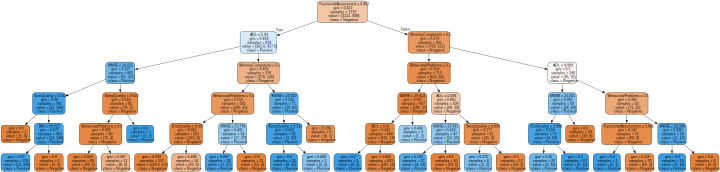

In [24]:
tree = DecisionTreeClassifier(random_state=2028, max_depth=5, min_samples_split=10) # 93.02 = 2028
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
tree.fit(X_train, y_train)
dot_data = export_graphviz(tree,out_file = None,
                           feature_names=X.columns,
                           class_names=['Negative','Positive'],
                           filled=True, rounded=True,
                           special_characters=True)
dot_data = 'digraph Tree {\nsize="10,10";\n' + '\n'.join(dot_data.split('\n')[1:])
d_tree_Comprehensible = graphviz.Source(dot_data)


#d_tree_Comprehensible.set_size('"5,10!"')

#display(d_tree_ZScore)
display(d_tree_Comprehensible)

#print(dot_data)
#dot_data = graphviz.Digraph(graph_attr={'size':'10,10!'})
#print(dot_data)

### Confusion Matrices

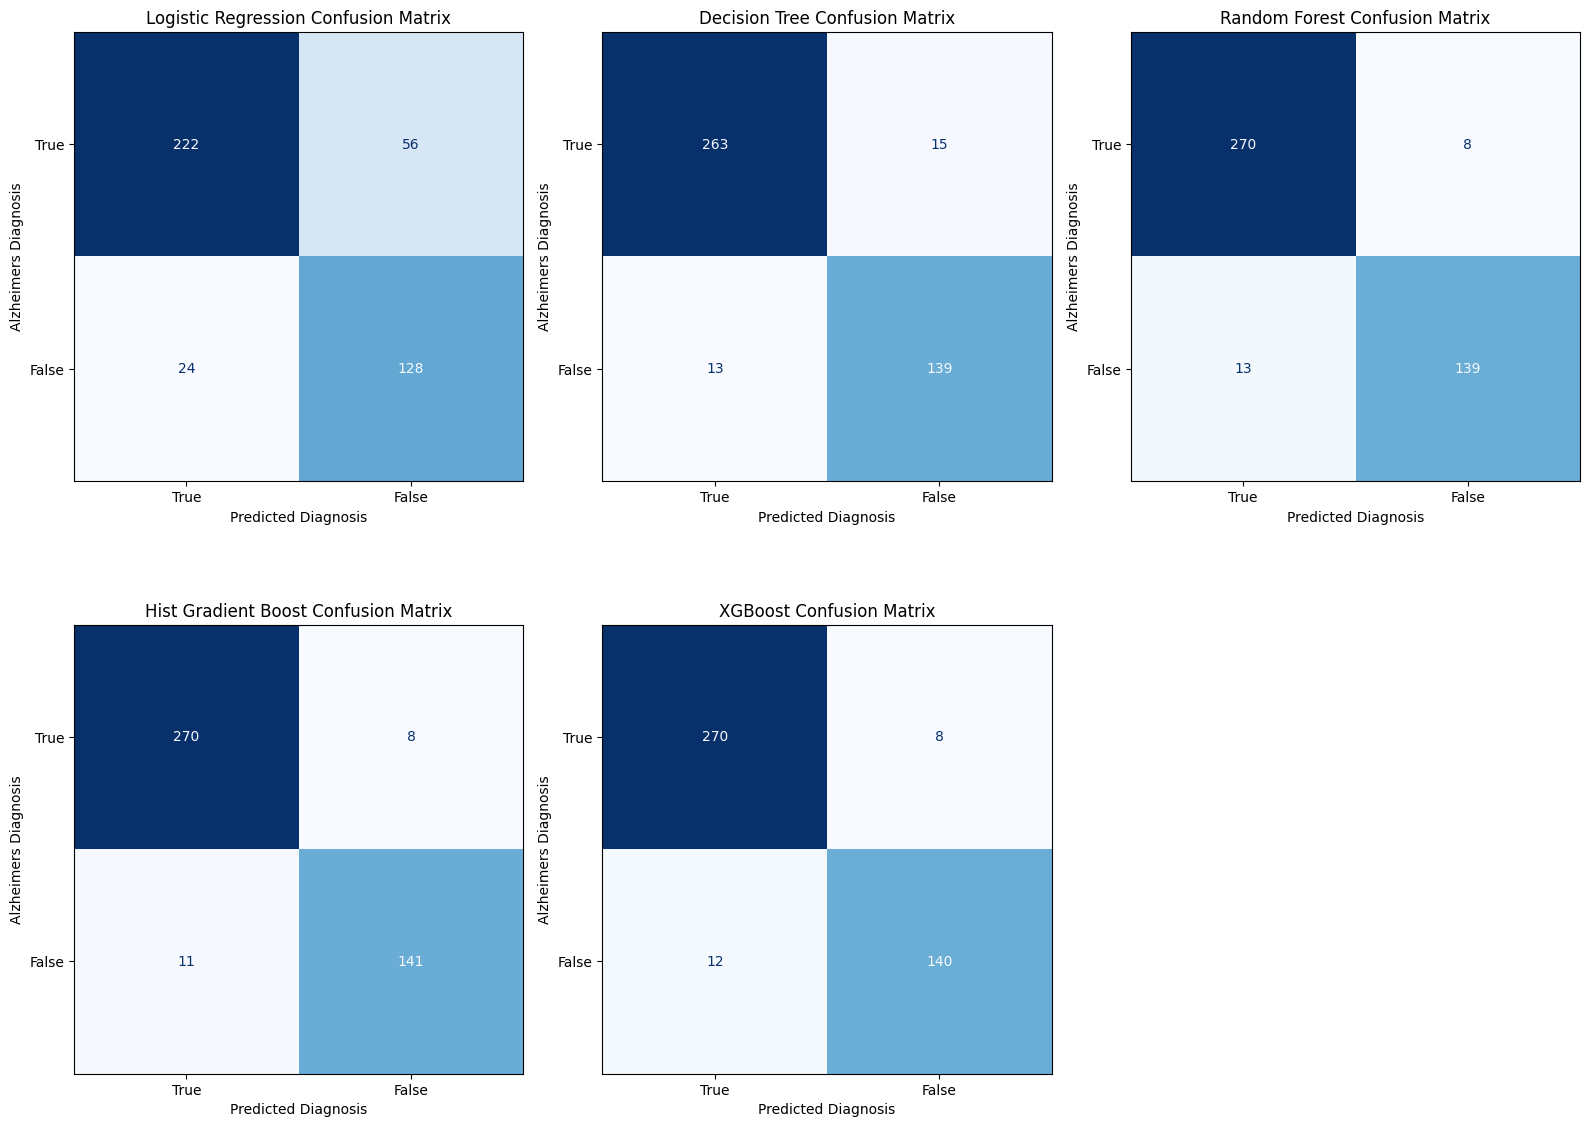

In [25]:
fig, axes = plt.subplots(2, 3, figsize=(16, 12))
for model_name, metrics in results.items():
    row, col, title = metrics['plot_pos']
    y_pred = metrics['y_pred']
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=["True", "False"])
    disp.plot(ax=axes[row][col], colorbar=False, cmap="Blues")
    axes[row][col].set_title(f"{title} Confusion Matrix")
    axes[row][col].set_ylabel("Alzheimers Diagnosis")
    axes[row][col].set_xlabel("Predicted Diagnosis")
fig.delaxes(axes[1][2])
plt.tight_layout()
plt.show()

### Classification Reports

In [26]:
for model_name, metrics in results.items():
    metrics['report'] = classification_report(y_test, metrics['y_pred'])
    
for model_name, metrics in results.items():
    print(f"{model_name} Classification Report:")
    print(metrics['report'])
    print('-' * 53)
    
#Logistic Regression Importance Values
'''
coefficients = log.coef_[0]
feat_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
feat_df['AbsCoefficient'] = feat_df['Coefficient'].abs()
feat_df = feat_df.sort_values(by='AbsCoefficient', ascending=True)
plt.figure(figsize=(10, 6))
plt.barh(feat_df['Feature'], feat_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Coefficients (Logistic Regression)')
plt.show()
'''

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.80      0.85       278
           1       0.70      0.84      0.76       152

    accuracy                           0.81       430
   macro avg       0.80      0.82      0.80       430
weighted avg       0.83      0.81      0.82       430

-----------------------------------------------------
DecisionTree Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       278
           1       0.90      0.91      0.91       152

    accuracy                           0.93       430
   macro avg       0.93      0.93      0.93       430
weighted avg       0.94      0.93      0.93       430

-----------------------------------------------------
RandomForest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       278
           1   

"\ncoefficients = log.coef_[0]\nfeat_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})\nfeat_df['AbsCoefficient'] = feat_df['Coefficient'].abs()\nfeat_df = feat_df.sort_values(by='AbsCoefficient', ascending=True)\nplt.figure(figsize=(10, 6))\nplt.barh(feat_df['Feature'], feat_df['Coefficient'])\nplt.xlabel('Coefficient Value')\nplt.title('Feature Coefficients (Logistic Regression)')\nplt.show()\n"

### Receiver Operating Characteristic Curves

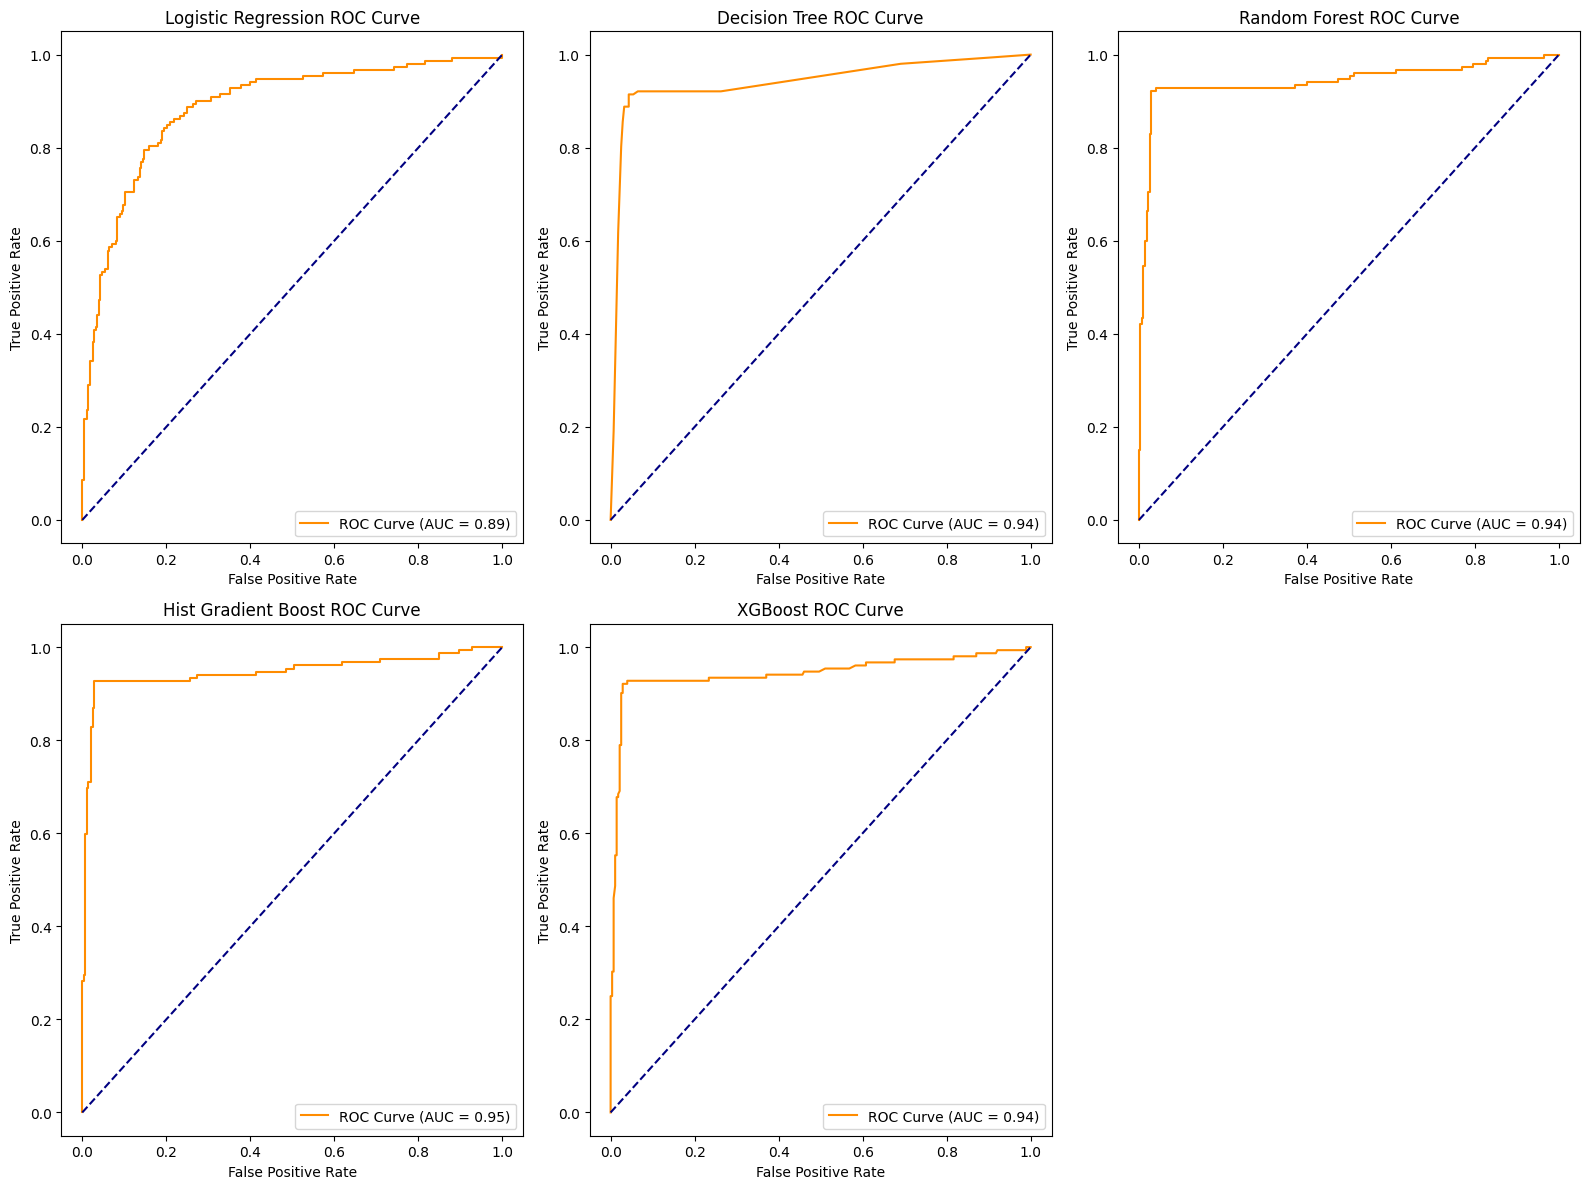

In [27]:
fig, axes = plt.subplots(2, 3, figsize=(16, 12))
for model_name, metrics in results.items():
    row, col, title = metrics['plot_pos']
    y_prob = metrics['y_prob_class1']
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    axes[row][col].plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
    axes[row][col].plot([0, 1], [0, 1], color='navy', linestyle='--')
    axes[row][col].set_xlabel('False Positive Rate')
    axes[row][col].set_ylabel('True Positive Rate')
    axes[row][col].set_title(f'{title} ROC Curve')
    axes[row][col].legend(loc="lower right")
fig.delaxes(axes[1][2])

plt.tight_layout()
plt.show()

## Best Model!

In [28]:
best_model = None
best_model_accuracy = -1

for model_name in results:
    if(results[model_name]["k-fold"] > best_model_accuracy):
        best_model = model_name
        best_model_accuracy = results[model_name]["k-fold"]
msgt = f'The best model after K-Fold Cross Validation 5, is {best_model} with an accuracy of {best_model_accuracy:.2f}%'
hw = len(msgt)
msgb = f'------Model Accuracy Rankings------'
print(f"{msgt}\n{msgb.center(hw)}")
ranks = []
for model_name in results:
    ranks.append((model_name, results[model_name]["k-fold"]))
for i in range(1, len(ranks)):
    j=i
    while j>0 and ranks[j][1] > ranks[j-1][1]:
        ranks[j], ranks[j-1] = ranks[j-1], ranks[j]
        j-=1
max_len = 0
for things in ranks:
    if(len(things[0]) > max_len):
        max_len = len(things[0])
for rank in ranks:
    msg = (f"{rank[0]:<{max_len}}|| {f'{rank[1]:.2f}%':>14}")
    print(msg.center(hw))
filler = ''
for i in range(len(msgb)):
    filler+="-"
print(filler.center(hw))

The best model after K-Fold Cross Validation 5, is XGBoost with an accuracy of 95.44%
                         ------Model Accuracy Rankings------                         
                         XGBoost           ||         95.44%                         
                         HistGradientBoost ||         95.11%                         
                         RandomForest      ||         95.07%                         
                         DecisionTree      ||         94.83%                         
                         LogisticRegression||         82.13%                         
                         -----------------------------------                         


## Model Fun

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.ndimage import gaussian_filter1d

def sequential_feature_risk_profile(model, scaler, X, num_points=50):
    """
    Plots risk profiles one at a time, prompting user to continue or stop.
    """
    # Create median patient profile
    median_patient = X.median().values.reshape(1, -1)
    
    # Show available features
    print("Available features:")
    for i, feature in enumerate(X.columns):
        print(f"{i+1}. {feature}")
    
    while True:
        try:
            # Get user input for feature selection
            selection = input("\nEnter feature number to plot (or 'q' to quit): ")
            if selection.lower() == 'q':
                break
                
            feature_idx = int(selection) - 1
            if feature_idx < 0 or feature_idx >= len(X.columns):
                print("Invalid feature number. Please try again.")
                continue
                
            feature_name = X.columns[feature_idx]
            
            plt.figure(figsize=(10, 6))
            
            # Create range of values for current feature
            feat_min = X[feature_name].min()
            feat_max = X[feature_name].max()
            feat_values = np.linspace(feat_min, feat_max, num_points)
            
            # Create test patients - vary only current feature
            test_patients = np.tile(median_patient, (num_points, 1))
            test_patients[:, feature_idx] = feat_values
            
            # Convert back to DataFrame to preserve feature names
            test_df = pd.DataFrame(test_patients, columns=X.columns)
            
            # Scale and predict
            scaled_data = scaler.transform(test_df)
            probs = model.predict_proba(scaled_data)[:, 1]
            probs_smooth = gaussian_filter1d(probs, sigma=2)
            # Plot
            plt.plot(feat_values, probs, color='darkred', linewidth=2)
            plt.title(f'Alzheimer\'s Risk vs. {feature_name}')
            plt.xlabel(feature_name)
            plt.ylabel('Predicted Probability')
            plt.axvline(x=median_patient[0, feature_idx], color='gray', linestyle='--', label='Median Value')
            plt.grid(True)
            plt.legend()
            plt.show()
            
        except ValueError:
            print("Please enter a valid number or 'q' to quit.")

# Usage
sequential_feature_risk_profile(results[best_model]["model"], scaler, X)

Available features:
1. Age
2. EducationLevel
3. BMI
4. Smoking
5. AlcoholConsumption
6. PhysicalActivity
7. DietQuality
8. SleepQuality
9. HeadInjury
10. Hypertension
11. CholesterolTotal
12. CholesterolLDL
13. CholesterolHDL
14. CholesterolTriglycerides
15. MMSE
16. FunctionalAssessment
17. MemoryComplaints
18. BehavioralProblems
19. ADL
20. Confusion
21. Disorientation
22. PersonalityChanges
23. DifficultyCompletingTasks
24. Forgetfulness
25. Gender_1
26. Ethnicity_1
27. Ethnicity_2
28. Ethnicity_3
29. FamilyHistoryAlzheimers_1


## Unsupervised Learning

Estimated number of clusters: 2
Number of noise points: 0


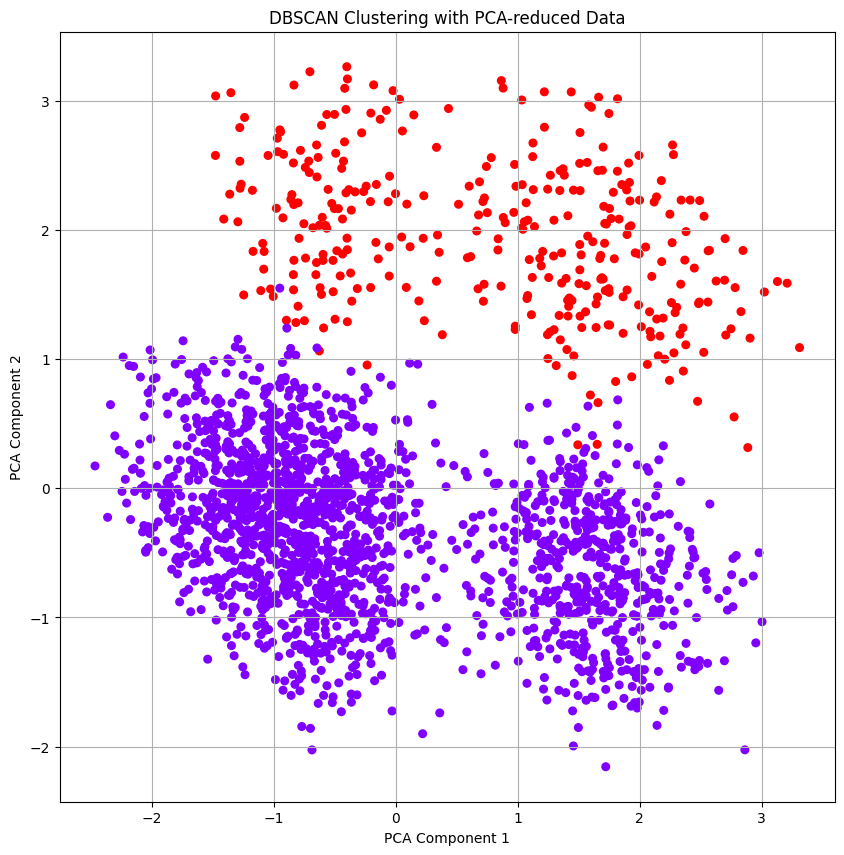

Cumulative variance explained by 2 principal components: 34.38%


            Age       BMI      MMSE  FunctionalAssessment  MemoryComplaints  \
PC_1  0.029244  0.074507  0.243193              0.411251          0.323696   
PC_2  0.130042  0.366697  0.251736              0.078399          0.087178   

      BehavioralProblems       ADL  Diagnosis  
PC_1            0.205992  0.372923   0.692127  
PC_2            0.789741  0.384343   0.009714  


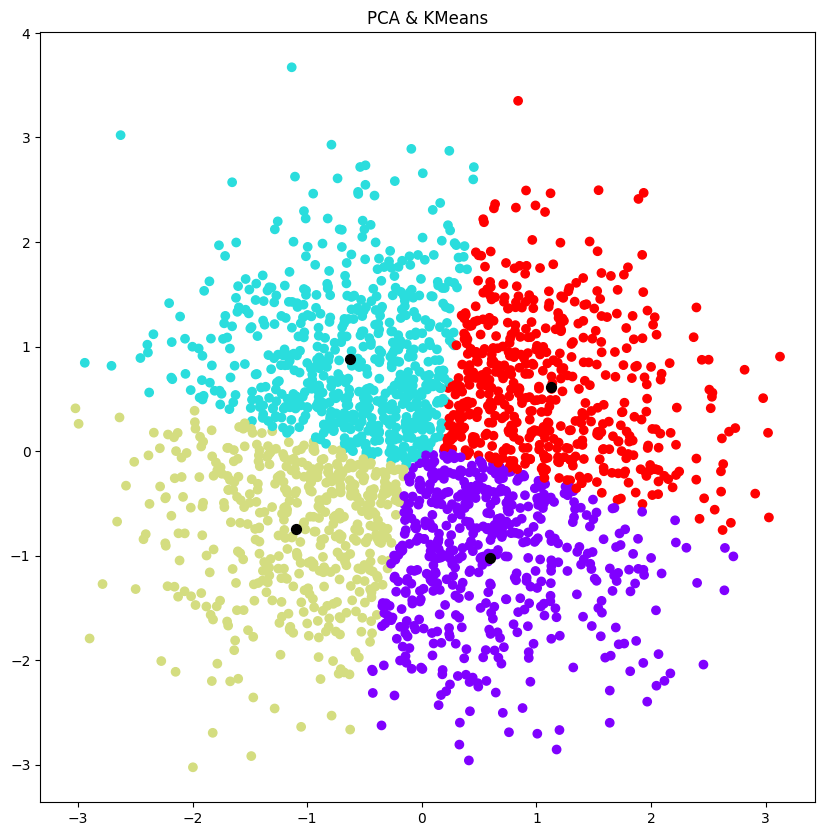

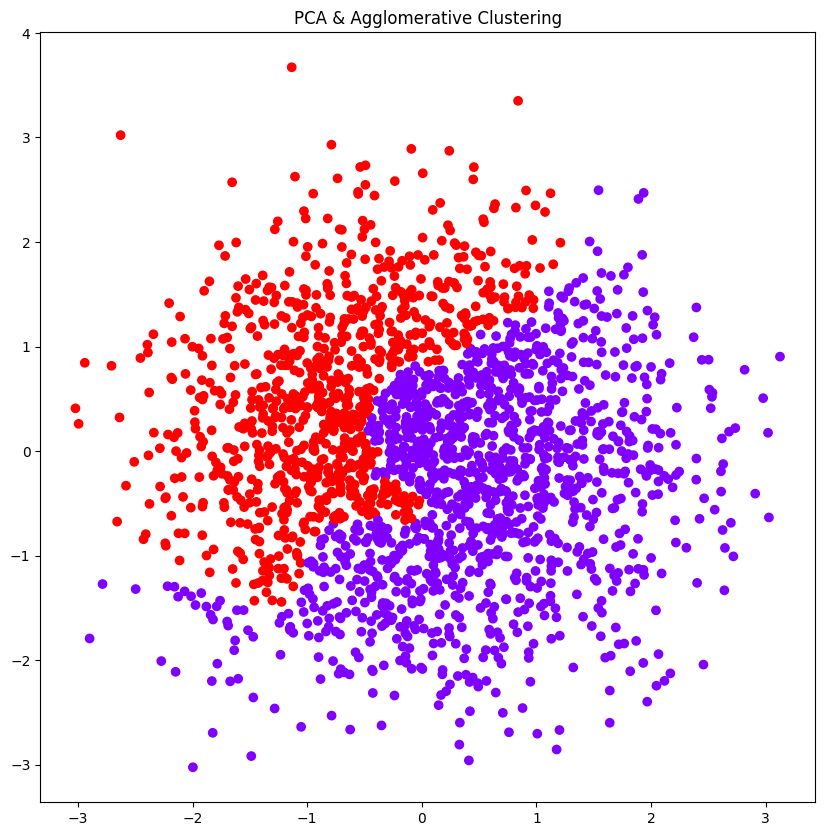

'------------- K-Means Clustering ---------\nkmeans = KMeans(n_clusters=5,random_state=202,n_init=\'auto\') # 93.02 = 2028\nkmeans.fit(X)\nresults[\'KMeans\'] = {\'model\':kmeans,\n                           \'labels\':kmeans.labels_,\n                           \'centroids\':kmeans.cluster_centers_,\n                           \'y\':kmeans.predict(X)}\n\n\n######## K-Means Clustering: Finding K ########\n# Elbow method to choose K\nX_K = X.drop(columns=[\'EducationLevel\',\'Smoking\',\'HeadInjury\',\'Hypertension\',\'MemoryComplaints\',\'BehavioralProblems\',\'Confusion\',\'Disorientation\',\'PersonalityChanges\',\'DifficultyCompletingTasks\',\'Forgetfulness\',\'Gender_1\',\'Ethnicity_1\',\'Ethnicity_2\',\'Ethnicity_3\',\'FamilyHistoryAlzheimers_1\']) # removed binary/ordinal data\nscaler = StandardScaler()\nX_K_scaled = scaler.fit_transform(X_K)\n\ninertia = []\nrangeOfK = (1,13+1)\nfor k in range(rangeOfK[0],rangeOfK[1]):\n    km = KMeans(n_clusters=k, random_state=42)\n    km.fit(X

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN, KMeans






from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
############
df = usableCSV[['Age', 'EducationLevel', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL']]
############



db = DBSCAN(eps=2.6, min_samples=7)

df = usableCSV[['Age', 'BMI', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints','BehavioralProblems', 'ADL', 'Diagnosis']]
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(df)

db_labels = db.fit_predict(X_scaled)
labels = db_labels
pca_2 = PCA(n_components=2)
data_pca = pca_2.fit_transform(X_scaled)
unique_labels = set(labels)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

n_noise = list(labels).count(-1)

print(f'Estimated number of clusters: {n_clusters}')
print(f'Number of noise points: {n_noise}')
plt.figure(figsize=(10, 10))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=db_labels, cmap='rainbow', s=30)

plt.title('DBSCAN Clustering with PCA-reduced Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()


print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))
dataset_pca = pd.DataFrame(abs(pca_2.components_), columns=df.columns, index=['PC_1', 'PC_2'])
print('\n\n', dataset_pca)


df = usableCSV[['Age', 'EducationLevel', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL']]
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(df)



pca = PCA(n_components=2)
data_ss = pca.fit_transform(X_scaled)
kmeans = KMeans(n_clusters=4)
y_kmeans = kmeans.fit_predict(data_ss)
kmeans.cluster_centers_
centroids = kmeans.cluster_centers_
plt.figure(figsize=(10,10))
plt.title("PCA & KMeans")
plt.scatter(data_ss[:,0], data_ss[:,1], c = y_kmeans, cmap='rainbow')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=50)
plt.show()
from sklearn.cluster import AgglomerativeClustering
hclust = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
golfers_hclust_labels = hclust.fit(data_ss).labels_
plt.figure(figsize=(10,10))
plt.title("PCA & Agglomerative Clustering")
plt.scatter(data_ss[:,0], data_ss[:,1], c = golfers_hclust_labels, cmap='rainbow')
plt.show()

#### Spencer's Unsupervised 

'''------------- K-Means Clustering ---------
kmeans = KMeans(n_clusters=5,random_state=202,n_init='auto') # 93.02 = 2028
kmeans.fit(X)
results['KMeans'] = {'model':kmeans,
                           'labels':kmeans.labels_,
                           'centroids':kmeans.cluster_centers_,
                           'y':kmeans.predict(X)}


######## K-Means Clustering: Finding K ########
# Elbow method to choose K
X_K = X.drop(columns=['EducationLevel','Smoking','HeadInjury','Hypertension','MemoryComplaints','BehavioralProblems','Confusion','Disorientation','PersonalityChanges','DifficultyCompletingTasks','Forgetfulness','Gender_1','Ethnicity_1','Ethnicity_2','Ethnicity_3','FamilyHistoryAlzheimers_1']) # removed binary/ordinal data
scaler = StandardScaler()
X_K_scaled = scaler.fit_transform(X_K)

inertia = []
rangeOfK = (1,13+1)
for k in range(rangeOfK[0],rangeOfK[1]):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_K_scaled)
    inertia.append(km.inertia_)

plt.plot(range(rangeOfK[0],rangeOfK[1]), inertia, marker='o')
plt.xlabel('K clusters')
plt.ylabel('Inertia')
plt.title("Elbow Method for Alzheimer's Data")
plt.show()

chosenK = 1

kmeans = KMeans(n_clusters=chosenK, random_state=42)
clusters = kmeans.fit_predict(X_K_scaled)
X_K['cluster'] = clusters

# Analyze clusters
print(X_K.groupby('cluster').mean())

######## K-Means Cluster ########
X_vis = X_K.copy()
X_vis['cluster'] = clusters

display(X_vis)
# 2D visualization with pairplot
sns.pairplot(X_vis, hue='cluster', palette='Set2', corner=True)
plt.suptitle('K-Means Clusters', y=1.02)
plt.show()
'''

In [31]:
from matplotlib.animation import FuncAnimation
from matplotlib import rc
from IPython.display import HTML
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d

def generate_age_risk(
    sample: pd.DataFrame,
    metrics_to_improve: list = ["FunctionalAssessment"],
    improvement_rate: float = 1.0,
    max_values: dict = None,
    min_values: dict = None,
    custom_directions: dict = None
) -> pd.DataFrame:
    default_bounds = {
        "FunctionalAssessment": {"max": 10, "min": 0, "default_dir": "increase"},
        "PhysicalActivity": {"max": 10, "min": 0, "default_dir": "increase"},
        "DietQuality": {"max": 10, "min": 0, "default_dir": "increase"},
        "SleepQuality": {"max": 10, "min": 0, "default_dir": "increase"},
        "BMI": {"max": 40, "min": 18.5, "default_dir": "decrease"},
        "AlcoholConsumption": {"max": 20, "min": 0, "default_dir": "decrease"}
    }

    max_values = max_values or {}
    min_values = min_values or {}
    custom_directions = custom_directions or {}

    original_age = sample["Age"].iloc[0]
    start_age = max(0, original_age - 10)
    ages = np.arange(start_age, 101, 1)
    result_rows = []

    for age in ages:
        new_row = sample.copy()
        new_row["Age"] = age
        
        if age > original_age:
            for metric in metrics_to_improve:
                if metric in new_row.columns:
                    original_value = sample[metric].iloc[0]
                    years_passed = age - original_age
                    
                    direction = custom_directions.get(metric)
                    if direction is None and metric in default_bounds:
                        direction = default_bounds[metric]["default_dir"]
                    
                    bounds = default_bounds.get(metric, {})
                    max_val = max_values.get(metric, bounds.get("max"))
                    min_val = min_values.get(metric, bounds.get("min"))
                    
                    if direction == "increase":
                        new_value = original_value + years_passed * improvement_rate
                        if max_val is not None:
                            new_value = min(new_value, max_val)
                    elif direction == "decrease":
                        new_value = original_value - years_passed * improvement_rate
                        if min_val is not None:
                            new_value = max(new_value, min_val)
                    else:
                        new_value = original_value
                    
                    new_row[metric] = new_value
        
        result_rows.append(new_row)

    return pd.concat(result_rows, ignore_index=True)

def create_ultra_smooth_animation(model_name, age_variants_df, scaler, sample_df,
                                  animation_speed=0.2, exponential_factor=3.0,
                                  metrics_to_improve: list = ["FunctionalAssessment"]):
    
    age_variants_df = pd.DataFrame(age_variants_df, columns=X.columns)
    age_variants_df = age_variants_df[age_variants_df["Age"] <= 100]
    model = results[model_name]['model']
    output_gif = f'risk_animation_{model_name}.gif'
    
    X_pred_scaled = scaler.transform(age_variants_df)
    
    risk_percent = model.predict_proba(X_pred_scaled)[:, 1] * 100
    risk_percent = np.clip(risk_percent, 0, 100)
    
    ages = age_variants_df["Age"].values

    X_orig_scaled = scaler.transform(sample_df)
    orig_risk = model.predict_proba(X_orig_scaled)[:, 1][0] * 100
    orig_risk = np.clip(orig_risk, 0, 100)
    original_age = sample_df["Age"].iloc[0]

    window_size = min(15, len(ages) - 1)
    if window_size % 2 == 0:
        window_size -= 1
    smoothed_risk = savgol_filter(risk_percent, window_size, 3) if window_size > 1 else risk_percent

    ages_hires = np.linspace(ages.min(), 100, 200)
    smoothed_risk_hires = interp1d(ages, smoothed_risk, kind='cubic', fill_value="extrapolate")(ages_hires)

    title_string = ", ".join(metrics_to_improve)

    risk_improvement = (orig_risk - smoothed_risk_hires) / orig_risk * 100
    risk_improvement = np.clip(risk_improvement, -100, 100)

    fig, ax = plt.subplots(figsize=(12, 7))
    ax.set_xlim(ages.min(), 100)
    ax.set_ylim(0, 100)
    ax.set_title(f"NeuroCurve's Alzheimer's Risk ({model_name})", fontsize=14, color='white')
    ax.set_xlabel(title_string + " improvements over time (Age)", fontsize=12, color='white')
    ax.set_ylabel("Risk Probability (%)", fontsize=12, color='white')
    ax.grid(True, linestyle='--', alpha=0.8, color='grey')
    ax.set_facecolor('black')
    ax.figure.patch.set_facecolor('black')

    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')

    for spine in ax.spines.values():
        spine.set_linewidth(2.5)
        spine.set_color('white')

    line, = ax.plot([], [], color='#90EE90', linewidth=7)
    moving_point = ax.scatter([], [], color='#90EE90', s=100, zorder=10)
    original_point = ax.scatter(original_age, orig_risk, color='blue', s=150, 
                                zorder=15, label=f'Current Risk (Age {original_age:.0f}: {orig_risk:.1f}%)')
    ax.legend(loc='lower left')

    info_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, 
                        fontsize=12, ha='left', va='top',
                        bbox=dict(facecolor='grey', alpha=0.9))
    
    improvement_text = ax.text(0.02, 0.5, '', transform=ax.transAxes,
                               fontsize=14, ha='left', va='center', weight='bold',
                               bbox=dict(facecolor='grey', alpha=0.9, linewidth=2))

    total_frames = int(len(ages_hires) * animation_speed)
    t = np.linspace(0, 1, total_frames)
    exp_t = (np.exp(exponential_factor * t) - 1) / (np.exp(exponential_factor) - 1)
    frame_indices = (exp_t * (len(ages_hires) - 1)).astype(int)

    delay_frames = int(3 * 15)

    def update(frame):
        if frame < total_frames:
            idx = frame_indices[frame]
            current_risk = smoothed_risk_hires[idx]
            current_improvement = risk_improvement[idx]
            
            line.set_data(ages_hires[:idx+1], smoothed_risk_hires[:idx+1])
            moving_point.set_offsets([[ages_hires[idx], current_risk]])
            
            info_text.set_text(f'Projected Age: {ages_hires[idx]:.1f}\nRisk: {current_risk:.1f}%')
            
            improvement_color = '#2ECC71' if current_improvement > 0 else '#E74C3C'
            improvement_text.set_text(f'Risk Improvement:\n{current_improvement:.1f}%')
            improvement_text.set_color(improvement_color)
                
        return line, moving_point, original_point, info_text, improvement_text

    ani = FuncAnimation(fig, update, frames=total_frames + delay_frames,
                        interval=int(150 / animation_speed), blit=True, repeat=True)
    
    ani.save(output_gif, writer='pillow', fps=15, dpi=100)
    plt.close()

    return HTML(f'<img src="{output_gif}">')
sample_df = X.iloc[[13]]

patient_age_risk = generate_age_risk(sample_df, ['FunctionalAssessment'])

create_ultra_smooth_animation(
    str(best_model),
    patient_age_risk,
    scaler,
    sample_df,
    metrics_to_improve=['FunctionalAssessment']
)

c:\Users\cjold\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:2676: UserWarning: [15:06:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
